In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [2]:
from HyperParameterTuning import *


# from MakeSTFTs import *
# from Train import *
# from AudioUtils import *

# Load a demo sample, convert to STFT and back and play the sound.
#demo_stft("Samples/Piano C4 Major 13.wav", 2048, 2048*3//4)

Using device=mps
middle-C=261.63 Hz
Using sample rate=44100 Hz, FFT=2048 buckets, hop=1536 samples, duration=1.0 sec = 28 time steps
Max frequency=8000 Hz --> freq_buckets=742
1 sample = 742 x 28 = 20,776


In [3]:
# Read all available samples and convert to STFTs
# This only needs to be done if the samples change or we change parameters such as the STFT size or the sample duration.

# make_STFTs()
# stop()

Loaded 1017 STFTs from STFTs.pkl
1017 STFTs
Using train=813 samples, test=204 samples.
MLPVAE_Incremental: stored params=[4, 1e-06, 8, 3, 3.7891760873357825]
optimiser: Adam batch=16, learning_rate=1.6e-05, weight_decay=0
StepWiseMLP: stored params=[2, -5, 50, 3, 0.49796540451973437]
MLPVAE_Incremental hidden=50, depth=3, ratio=0.5, latent=8, VAE depth=3, VAE ratio=3.79
VAE layers=[1400, 1378, 1100, 8]
MLP=2,929,424, VAE=6,922,772, approx total=9,852,196
StepWiseMLPAutoEncoder 2,929,424 parameters, compression=14.8
VariationalAutoEncoder: layers=[1400, 1378, 1100, 8], parameters=6,922,772, compression=175.0
CombinedVAE 9,852,196 parameters, compression=175.0
StepWiseMLPAutoEncoder: loading weights & biases from file 'Models/StepWiseMLP.wab'
Freezing model StepWiseMLPAutoEncoder
model=CombinedVAE(
  (auto_encoder): StepWiseMLPAutoEncoder(
    (encoder): Sequential(
      (0): Linear(in_features=1485, out_features=654, bias=True)
      (1): ReLU()
      (2): Linear(in_features=654, out_f

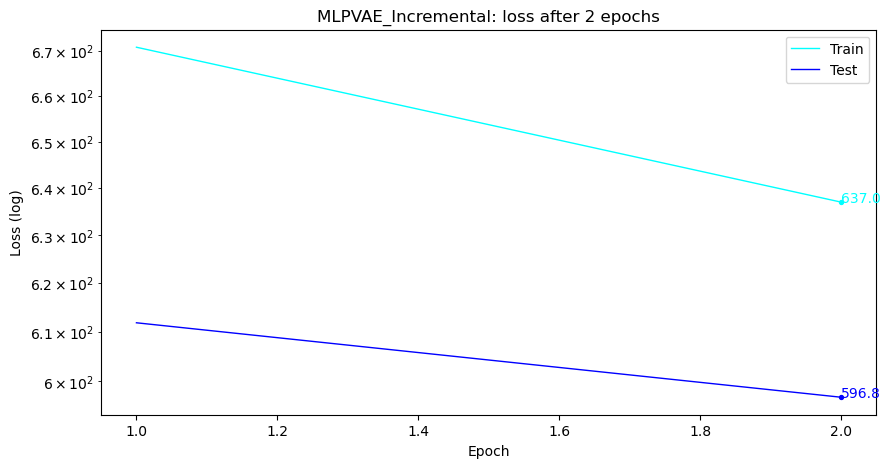

total=6 sec, epoch=2 (3.2 sec/epoch), train=637.0 (-5.04%), test=596.8 (-2.46%), overfit=0.94
total=13 sec, epoch=4 (3.1 sec/epoch), train=612.3 (-1.74%), test=576.6 (-1.31%), overfit=0.94


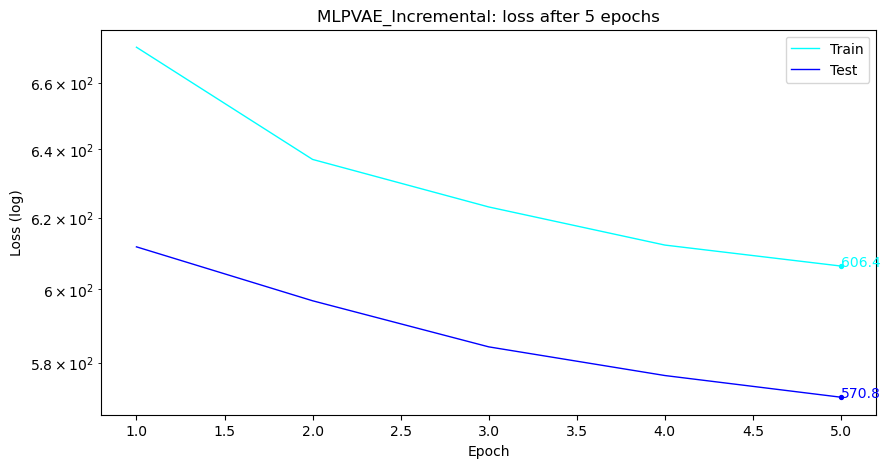

*** Best! loss=600.51
MLPVAE_Incremental hidden=50, depth=3, ratio=0.5, latent=8, VAE depth=3, VAE ratio=3.79 (params=6,922,772, trainable=6,922,772 = 100.0%)
Adam batch=16, learning_rate=1.6e-05, weight_decay=0
hyper-parameters: [4, 1e-06, 8, 3, 3.7891760873357825]


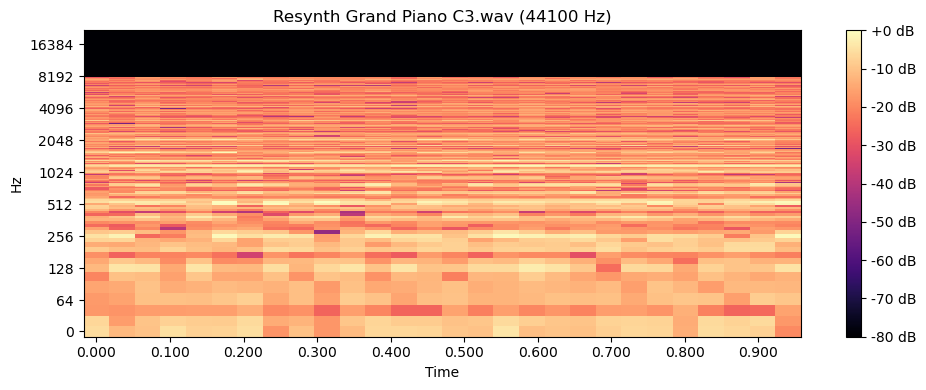

total=19 sec, epoch=6 (3.1 sec/epoch), train=600.5 (-0.98%), test=567.1 (-0.66%), overfit=0.94
total=25 sec, epoch=8 (3.1 sec/epoch), train=595.5 (-0.32%), test=561.1 (-0.62%), overfit=0.94


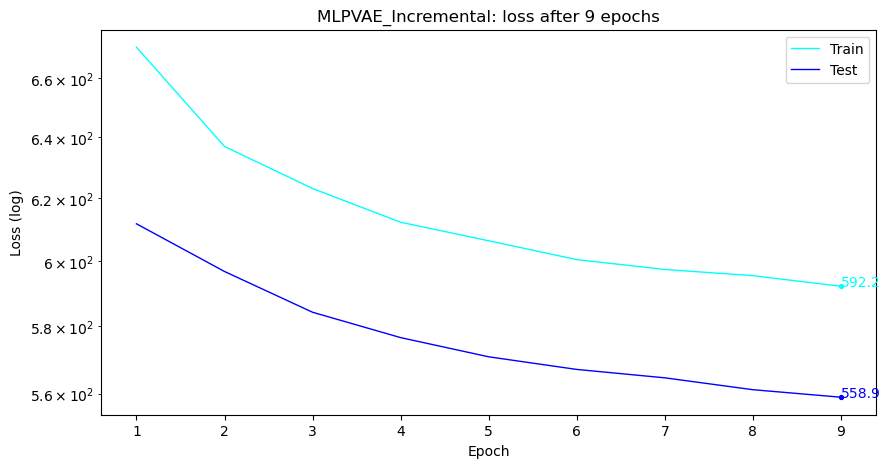

total=31 sec, epoch=10 (3.1 sec/epoch), train=589.5 (-0.46%), test=554.8 (-0.73%), overfit=0.94
total=37 sec, epoch=12 (3.1 sec/epoch), train=582.4 (-0.48%), test=549.6 (-0.61%), overfit=0.94
total=43 sec, epoch=14 (3.0 sec/epoch), train=576.4 (-0.28%), test=547.6 (0.24%), overfit=0.95


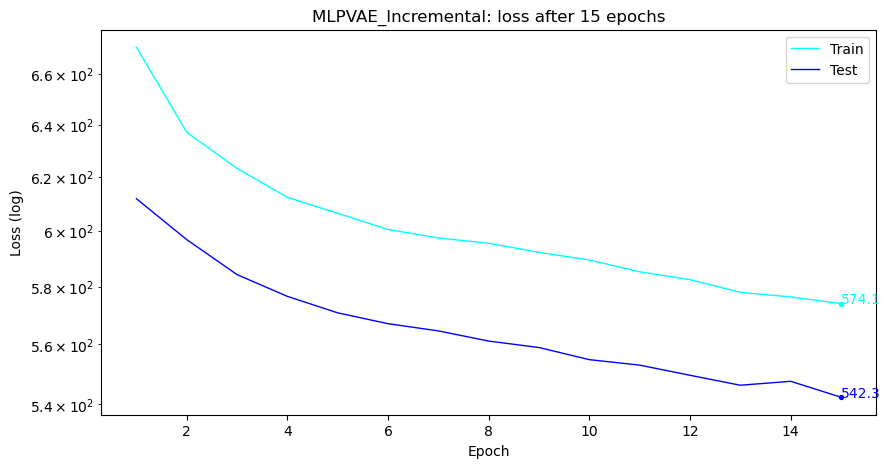

total=49 sec, epoch=16 (3.0 sec/epoch), train=571.2 (-0.50%), test=540.2 (-0.39%), overfit=0.95
*** Best! loss=568.29
MLPVAE_Incremental hidden=50, depth=3, ratio=0.5, latent=8, VAE depth=3, VAE ratio=3.79 (params=6,922,772, trainable=6,922,772 = 100.0%)
Adam batch=16, learning_rate=1.6e-05, weight_decay=0
hyper-parameters: [4, 1e-06, 8, 3, 3.7891760873357825]


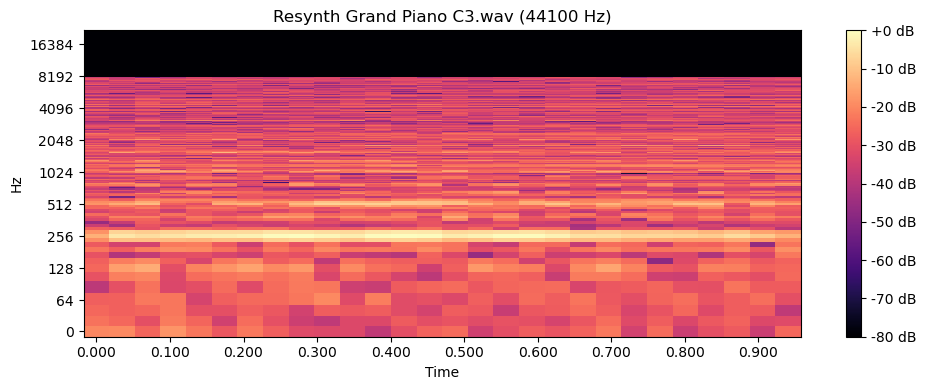

total=55 sec, epoch=18 (3.0 sec/epoch), train=568.2 (-0.02%), test=536.6 (-1.03%), overfit=0.94
total=61 sec, epoch=20 (3.0 sec/epoch), train=564.3 (0.03%), test=536.5 (0.45%), overfit=0.95
total=66 sec, epoch=22 (3.0 sec/epoch), train=562.2 (-0.01%), test=530.2 (-0.59%), overfit=0.94


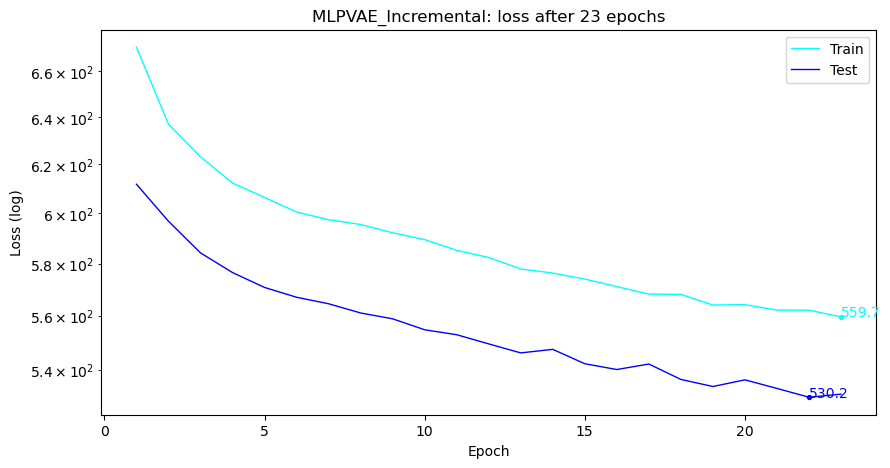

total=72 sec, epoch=24 (3.0 sec/epoch), train=558.0 (-0.30%), test=531.2 (-0.02%), overfit=0.95
total=78 sec, epoch=26 (3.0 sec/epoch), train=554.9 (-0.41%), test=529.5 (-0.00%), overfit=0.95
total=84 sec, epoch=28 (3.0 sec/epoch), train=552.4 (-0.38%), test=528.3 (-0.10%), overfit=0.96
total=90 sec, epoch=30 (3.0 sec/epoch), train=549.6 (-0.10%), test=524.3 (-0.03%), overfit=0.95
total=96 sec, epoch=32 (3.0 sec/epoch), train=547.1 (-0.25%), test=523.7 (0.07%), overfit=0.96
total=102 sec, epoch=34 (3.0 sec/epoch), train=543.9 (-0.31%), test=522.5 (-0.10%), overfit=0.96


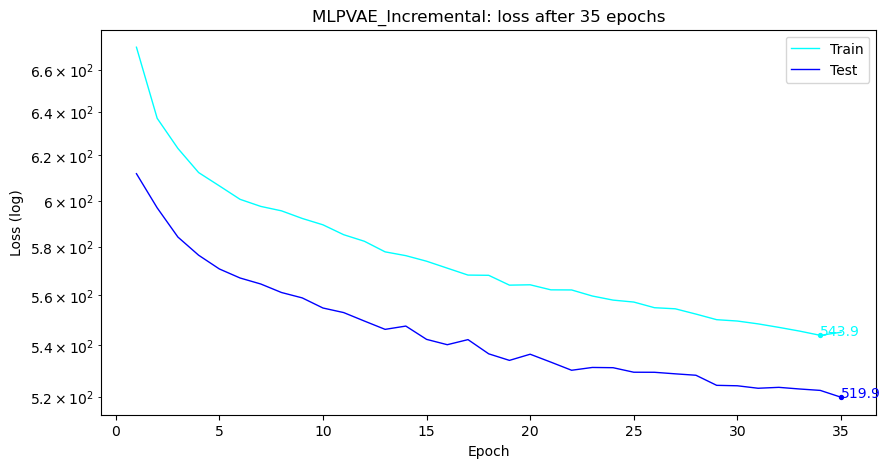

total=108 sec, epoch=36 (3.0 sec/epoch), train=542.6 (-0.46%), test=520.7 (0.15%), overfit=0.96
total=113 sec, epoch=38 (3.0 sec/epoch), train=541.3 (-0.30%), test=518.8 (0.09%), overfit=0.96
*** Best! loss=538.70
MLPVAE_Incremental hidden=50, depth=3, ratio=0.5, latent=8, VAE depth=3, VAE ratio=3.79 (params=6,922,772, trainable=6,922,772 = 100.0%)
Adam batch=16, learning_rate=1.6e-05, weight_decay=0
hyper-parameters: [4, 1e-06, 8, 3, 3.7891760873357825]


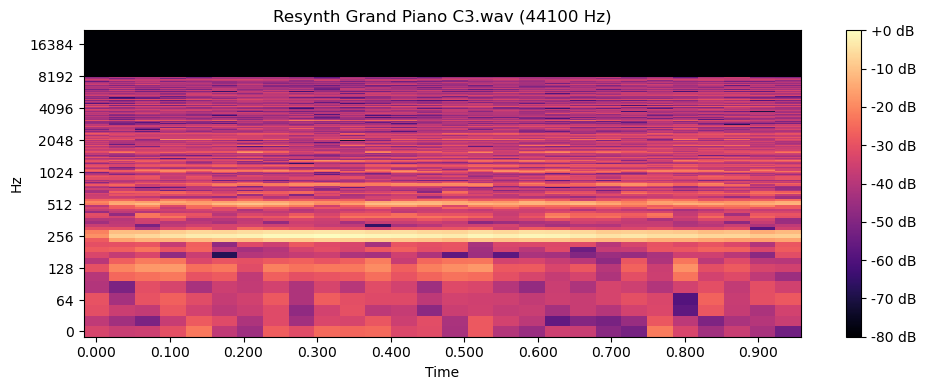

total=119 sec, epoch=40 (3.0 sec/epoch), train=538.7 (-0.58%), test=518.7 (0.01%), overfit=0.96
total=125 sec, epoch=42 (3.0 sec/epoch), train=539.1 (-0.06%), test=518.2 (-0.15%), overfit=0.96
total=131 sec, epoch=44 (3.0 sec/epoch), train=539.4 (-0.02%), test=517.6 (0.14%), overfit=0.96
total=137 sec, epoch=46 (3.0 sec/epoch), train=537.1 (-0.01%), test=515.5 (-0.32%), overfit=0.96
total=143 sec, epoch=48 (3.0 sec/epoch), train=536.0 (-0.03%), test=518.3 (0.43%), overfit=0.97
total=149 sec, epoch=50 (3.0 sec/epoch), train=536.0 (0.40%), test=516.5 (0.38%), overfit=0.96


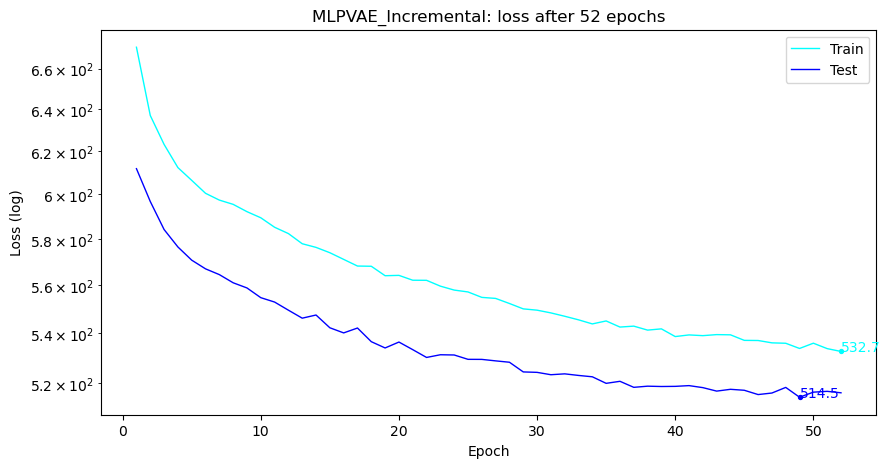

total=155 sec, epoch=52 (3.0 sec/epoch), train=532.7 (-0.21%), test=516.2 (-0.11%), overfit=0.97
total=161 sec, epoch=54 (3.0 sec/epoch), train=534.9 (0.73%), test=514.8 (0.14%), overfit=0.96
total=167 sec, epoch=56 (3.0 sec/epoch), train=532.6 (0.05%), test=513.4 (-0.20%), overfit=0.96
total=173 sec, epoch=58 (3.0 sec/epoch), train=531.7 (0.09%), test=514.0 (-0.16%), overfit=0.97
total=178 sec, epoch=60 (3.0 sec/epoch), train=529.2 (-0.09%), test=511.9 (-0.82%), overfit=0.97
total=184 sec, epoch=62 (3.0 sec/epoch), train=529.3 (-0.07%), test=511.6 (-0.27%), overfit=0.97
total=190 sec, epoch=64 (3.0 sec/epoch), train=527.6 (0.03%), test=509.4 (-0.72%), overfit=0.97
total=196 sec, epoch=66 (3.0 sec/epoch), train=529.4 (0.02%), test=513.6 (0.25%), overfit=0.97
total=202 sec, epoch=68 (3.0 sec/epoch), train=525.3 (-0.45%), test=508.4 (-0.89%), overfit=0.97
total=208 sec, epoch=70 (3.0 sec/epoch), train=527.0 (0.29%), test=511.3 (0.04%), overfit=0.97
total=214 sec, epoch=72 (3.0 sec/epoch)

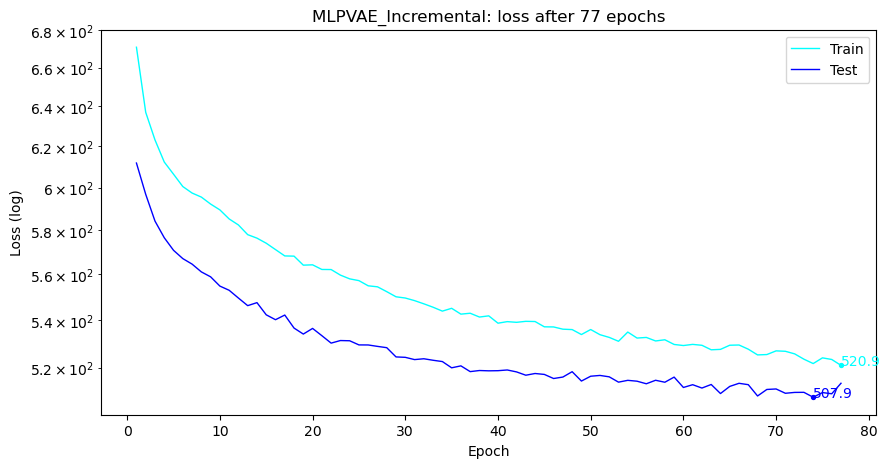

total=231 sec, epoch=78 (3.0 sec/epoch), train=520.7 (-0.04%), test=506.1 (-1.46%), overfit=0.97
total=237 sec, epoch=80 (3.0 sec/epoch), train=520.6 (-0.10%), test=506.2 (-0.65%), overfit=0.97
total=243 sec, epoch=82 (3.0 sec/epoch), train=520.7 (0.08%), test=510.3 (0.60%), overfit=0.98
total=249 sec, epoch=84 (3.0 sec/epoch), train=520.7 (0.07%), test=509.9 (0.80%), overfit=0.98
total=255 sec, epoch=86 (3.0 sec/epoch), train=517.2 (-0.48%), test=506.0 (0.15%), overfit=0.98
total=261 sec, epoch=88 (3.0 sec/epoch), train=518.2 (-0.01%), test=504.0 (-0.20%), overfit=0.97
total=267 sec, epoch=90 (3.0 sec/epoch), train=514.7 (-0.12%), test=506.1 (0.16%), overfit=0.98
total=273 sec, epoch=92 (3.0 sec/epoch), train=517.2 (-0.12%), test=502.7 (-1.33%), overfit=0.97
total=278 sec, epoch=94 (3.0 sec/epoch), train=515.5 (-0.04%), test=503.2 (-0.51%), overfit=0.98
total=284 sec, epoch=96 (3.0 sec/epoch), train=516.8 (0.16%), test=506.9 (0.19%), overfit=0.98
total=290 sec, epoch=98 (3.0 sec/epoch

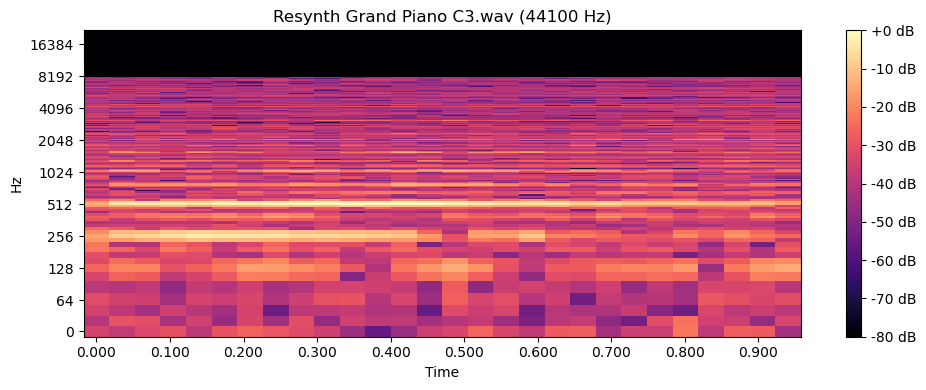

total=320 sec, epoch=108 (3.0 sec/epoch), train=511.2 (0.02%), test=503.1 (0.50%), overfit=0.98
total=325 sec, epoch=110 (3.0 sec/epoch), train=514.0 (0.59%), test=506.2 (0.44%), overfit=0.98
total=331 sec, epoch=112 (3.0 sec/epoch), train=511.2 (-0.28%), test=503.0 (-0.35%), overfit=0.98
total=337 sec, epoch=114 (3.0 sec/epoch), train=509.8 (-0.40%), test=501.2 (0.04%), overfit=0.98


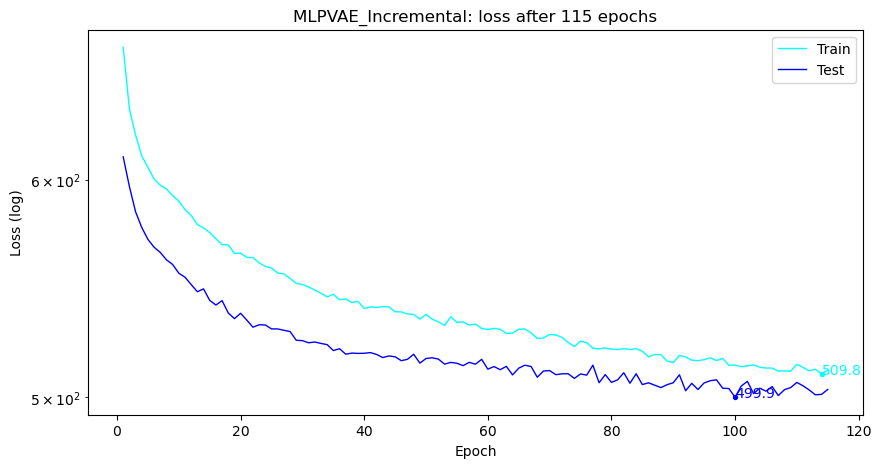

total=343 sec, epoch=116 (3.0 sec/epoch), train=511.3 (-0.04%), test=503.0 (-0.05%), overfit=0.98
total=349 sec, epoch=118 (3.0 sec/epoch), train=509.3 (0.36%), test=503.7 (0.23%), overfit=0.99
total=355 sec, epoch=120 (3.0 sec/epoch), train=510.7 (0.18%), test=500.7 (-0.56%), overfit=0.98
total=361 sec, epoch=122 (3.0 sec/epoch), train=506.9 (-0.31%), test=502.5 (0.43%), overfit=0.99
total=367 sec, epoch=124 (3.0 sec/epoch), train=507.3 (-0.64%), test=502.2 (-0.63%), overfit=0.99
total=373 sec, epoch=126 (3.0 sec/epoch), train=506.4 (-0.29%), test=502.5 (-0.90%), overfit=0.99
total=379 sec, epoch=128 (3.0 sec/epoch), train=507.3 (-0.01%), test=502.6 (0.54%), overfit=0.99
total=384 sec, epoch=130 (3.0 sec/epoch), train=505.6 (-0.22%), test=504.9 (0.09%), overfit=1.00
total=390 sec, epoch=132 (3.0 sec/epoch), train=507.2 (0.11%), test=501.5 (-0.71%), overfit=0.99
total=396 sec, epoch=134 (3.0 sec/epoch), train=505.9 (-0.25%), test=501.7 (0.56%), overfit=0.99
total=402 sec, epoch=136 (3.

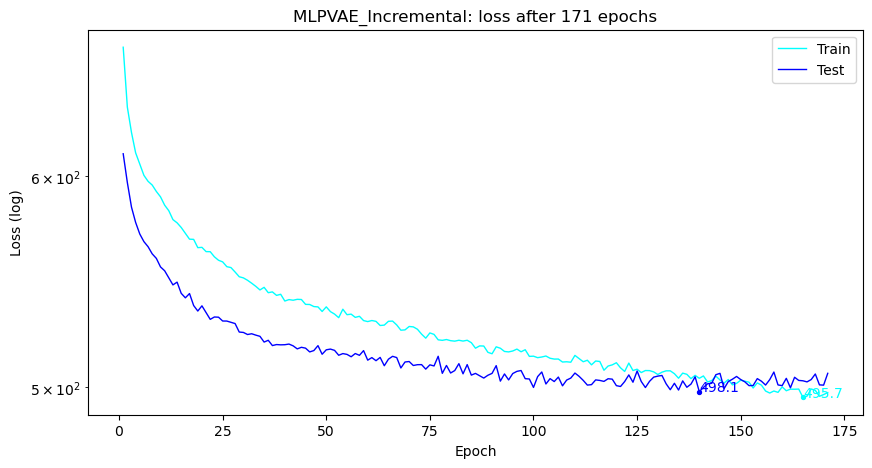

total=507 sec, epoch=172 (3.0 sec/epoch), train=495.5 (-0.44%), test=502.4 (-0.72%), overfit=1.01
total=513 sec, epoch=174 (2.9 sec/epoch), train=498.4 (0.61%), test=503.1 (0.34%), overfit=1.01
total=519 sec, epoch=176 (2.9 sec/epoch), train=495.0 (0.13%), test=500.3 (-1.15%), overfit=1.01
total=525 sec, epoch=178 (2.9 sec/epoch), train=495.3 (-0.05%), test=503.4 (0.85%), overfit=1.02
total=531 sec, epoch=180 (2.9 sec/epoch), train=492.3 (-0.17%), test=496.1 (-0.62%), overfit=1.01
total=537 sec, epoch=182 (2.9 sec/epoch), train=495.2 (0.20%), test=499.2 (-0.71%), overfit=1.01
total=543 sec, epoch=184 (2.9 sec/epoch), train=494.4 (0.21%), test=499.6 (-0.77%), overfit=1.01
total=549 sec, epoch=186 (2.9 sec/epoch), train=490.8 (-0.82%), test=502.7 (-0.19%), overfit=1.02
total=555 sec, epoch=188 (3.0 sec/epoch), train=491.2 (-0.09%), test=498.1 (-0.96%), overfit=1.01
total=561 sec, epoch=190 (3.0 sec/epoch), train=492.8 (0.34%), test=499.0 (0.32%), overfit=1.01
total=567 sec, epoch=192 (3.

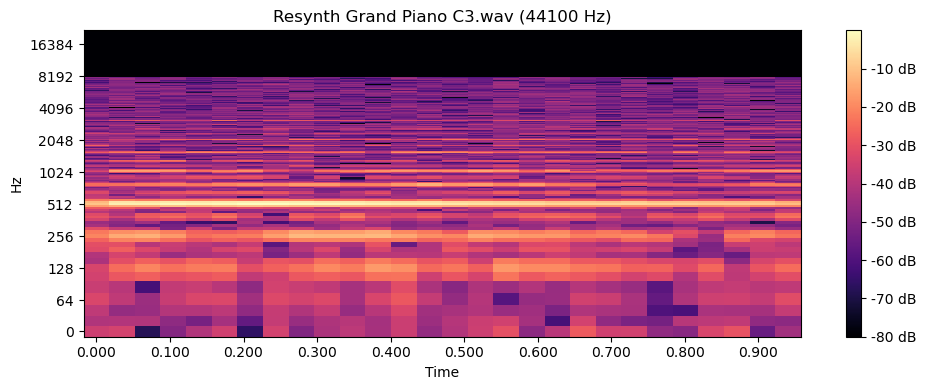

total=627 sec, epoch=212 (3.0 sec/epoch), train=485.2 (0.11%), test=502.5 (1.16%), overfit=1.04
total=633 sec, epoch=214 (3.0 sec/epoch), train=484.7 (0.09%), test=498.2 (-0.94%), overfit=1.03
total=639 sec, epoch=216 (3.0 sec/epoch), train=484.2 (0.18%), test=496.1 (-0.11%), overfit=1.02
total=645 sec, epoch=218 (3.0 sec/epoch), train=483.4 (0.06%), test=500.2 (0.14%), overfit=1.03
total=651 sec, epoch=220 (3.0 sec/epoch), train=484.6 (0.09%), test=497.9 (-0.38%), overfit=1.03
total=657 sec, epoch=222 (3.0 sec/epoch), train=481.1 (-0.51%), test=498.8 (-0.14%), overfit=1.04
total=663 sec, epoch=224 (3.0 sec/epoch), train=481.0 (-0.16%), test=499.2 (1.03%), overfit=1.04
total=669 sec, epoch=226 (3.0 sec/epoch), train=480.4 (-0.24%), test=501.9 (0.50%), overfit=1.04
total=675 sec, epoch=228 (3.0 sec/epoch), train=480.8 (0.53%), test=494.7 (-0.93%), overfit=1.03
total=681 sec, epoch=230 (3.0 sec/epoch), train=481.1 (-0.06%), test=500.9 (0.26%), overfit=1.04
total=687 sec, epoch=232 (3.0 s

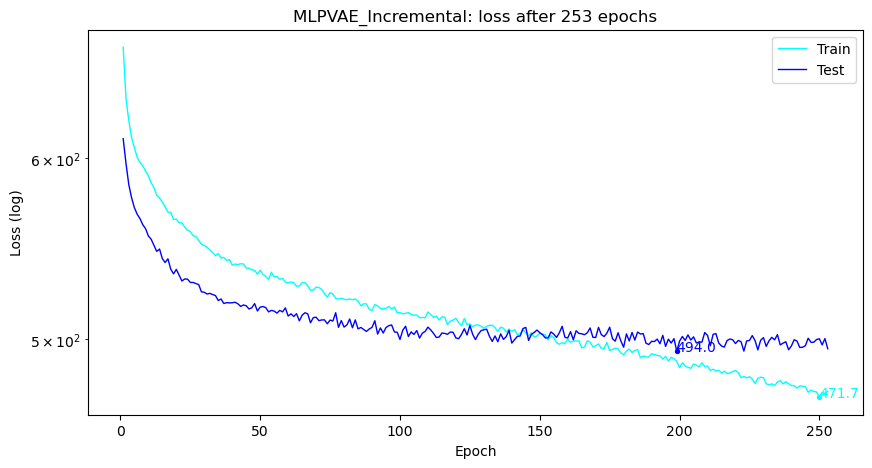

total=753 sec, epoch=254 (3.0 sec/epoch), train=472.1 (-0.52%), test=499.5 (0.85%), overfit=1.06
total=759 sec, epoch=256 (3.0 sec/epoch), train=473.8 (0.30%), test=496.8 (-0.81%), overfit=1.05
total=765 sec, epoch=258 (3.0 sec/epoch), train=471.6 (-0.00%), test=494.6 (-0.22%), overfit=1.05
total=771 sec, epoch=260 (3.0 sec/epoch), train=469.8 (-0.01%), test=501.3 (0.95%), overfit=1.07
total=777 sec, epoch=262 (3.0 sec/epoch), train=471.5 (0.06%), test=500.3 (0.84%), overfit=1.06
total=783 sec, epoch=264 (3.0 sec/epoch), train=471.5 (0.18%), test=499.5 (1.06%), overfit=1.06
total=789 sec, epoch=266 (3.0 sec/epoch), train=471.5 (0.49%), test=497.0 (-0.17%), overfit=1.05
total=795 sec, epoch=268 (3.0 sec/epoch), train=469.0 (-0.12%), test=501.2 (0.70%), overfit=1.07
total=801 sec, epoch=270 (3.0 sec/epoch), train=467.9 (-0.39%), test=499.0 (-0.30%), overfit=1.07
total=807 sec, epoch=272 (3.0 sec/epoch), train=467.0 (-0.33%), test=502.5 (0.88%), overfit=1.08
total=813 sec, epoch=274 (3.0 

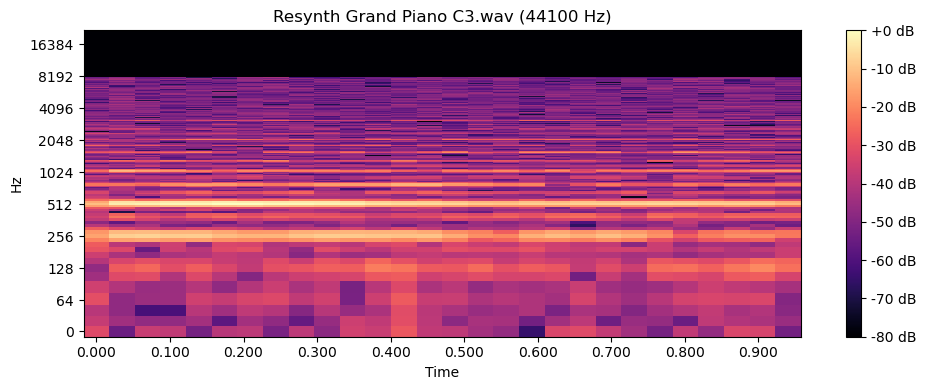

total=896 sec, epoch=302 (3.0 sec/epoch), train=461.3 (0.23%), test=503.8 (1.04%), overfit=1.09
total=902 sec, epoch=304 (3.0 sec/epoch), train=460.8 (0.07%), test=504.5 (0.76%), overfit=1.09
total=908 sec, epoch=306 (3.0 sec/epoch), train=460.5 (0.14%), test=500.1 (-0.16%), overfit=1.09
total=914 sec, epoch=308 (3.0 sec/epoch), train=460.2 (-0.09%), test=498.2 (-0.34%), overfit=1.08
total=920 sec, epoch=310 (3.0 sec/epoch), train=459.5 (-0.38%), test=502.0 (-0.39%), overfit=1.09
total=926 sec, epoch=312 (3.0 sec/epoch), train=458.3 (-0.41%), test=503.6 (-0.10%), overfit=1.10
total=932 sec, epoch=314 (3.0 sec/epoch), train=459.6 (-0.08%), test=500.2 (-0.02%), overfit=1.09
total=937 sec, epoch=316 (3.0 sec/epoch), train=456.9 (-0.51%), test=499.8 (0.11%), overfit=1.09
total=943 sec, epoch=318 (3.0 sec/epoch), train=457.8 (0.66%), test=503.1 (0.00%), overfit=1.10
total=949 sec, epoch=320 (3.0 sec/epoch), train=459.1 (0.20%), test=505.0 (0.61%), overfit=1.10
total=955 sec, epoch=322 (3.0 

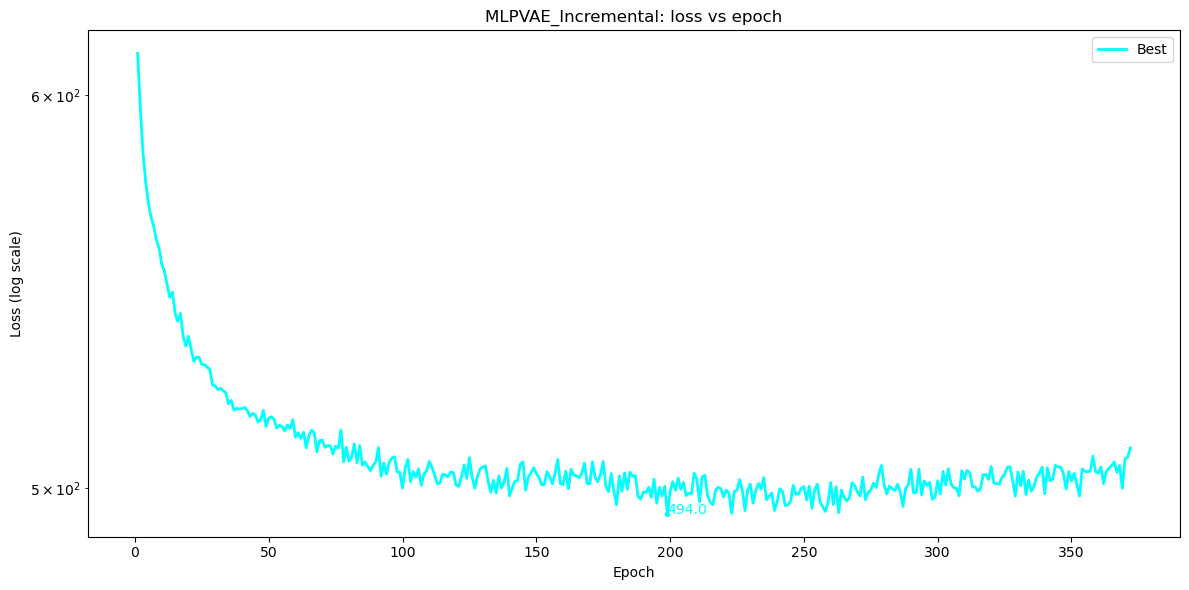

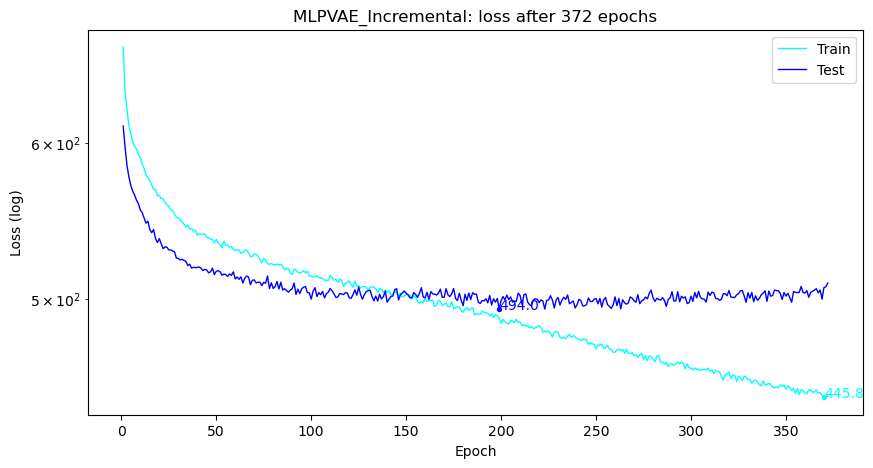

In [4]:
# Find out the best hyper-parameters to train this model (typically needs to run overnight)
#model = "StepWiseMLP" # or "RNNAutoEncoder" and RNN_VAE_Incremental", or "StepWiseMLP" and "MLPVAE_Incremental"


#model = "RNNAutoEncoder"
#model = "RNN_VAE"
#model = "RNN_VAE_Incremental"

#model = "StepWiseMLP"
#model = "MLP_VAE"
model = "MLPVAE_Incremental"

#model = "RNN_F&T"

#model = "STFT_VAE"

# First optimise the hyper-parameters for this model
#optimise_hyper_parameters(model)

# Then train using the best hyper-parameters
train_best_params(model)


# Alternatively, refine the training for the best set of hyper-parameters we've found


MLPVAE_Incremental: stored params=[4, 1e-06, 8, 3, 3.7891760873357825]
StepWiseMLP: stored params=[2, -5, 50, 3, 0.49796540451973437]
MLPVAE_Incremental hidden=50, depth=3, ratio=0.5, latent=8, VAE depth=3, VAE ratio=3.79
VAE layers=[1400, 1378, 1100, 8]
MLP=2,929,424, VAE=6,922,772, approx total=9,852,196
StepWiseMLPAutoEncoder 2,929,424 parameters, compression=14.8
VariationalAutoEncoder: layers=[1400, 1378, 1100, 8], parameters=6,922,772, compression=175.0
CombinedVAE 9,852,196 parameters, compression=175.0
StepWiseMLPAutoEncoder: loading weights & biases from file 'Models/StepWiseMLP.wab'
Freezing model StepWiseMLPAutoEncoder
model=CombinedVAE(
  (auto_encoder): StepWiseMLPAutoEncoder(
    (encoder): Sequential(
      (0): Linear(in_features=1485, out_features=654, bias=True)
      (1): ReLU()
      (2): Linear(in_features=654, out_features=312, bias=True)
      (3): ReLU()
      (4): Linear(in_features=312, out_features=50, bias=True)
    )
    (decoder): Sequential(
      (0): Li

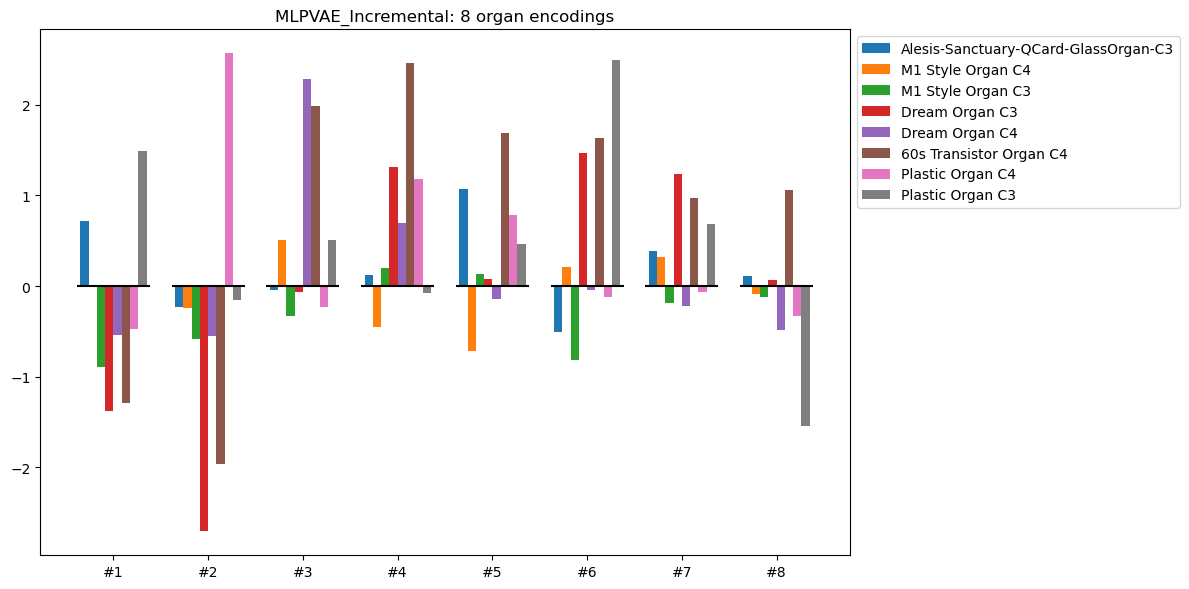

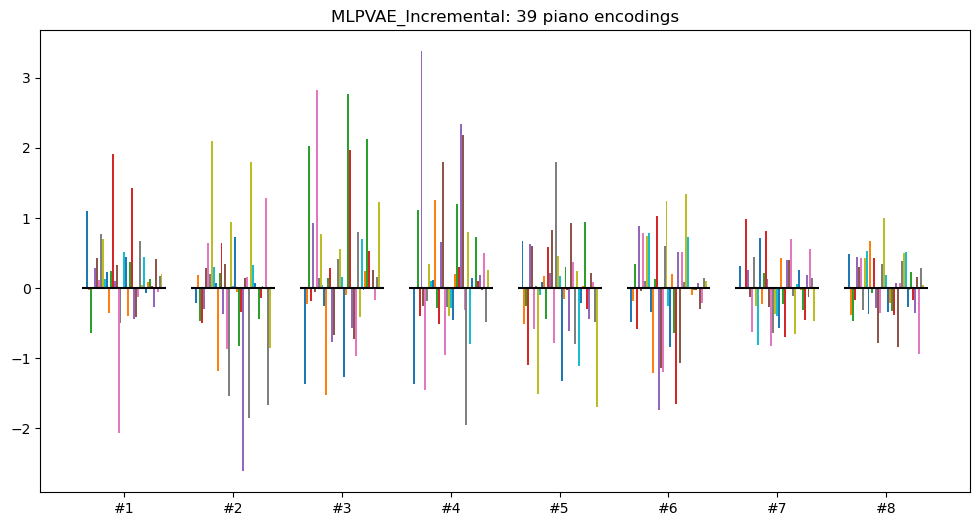

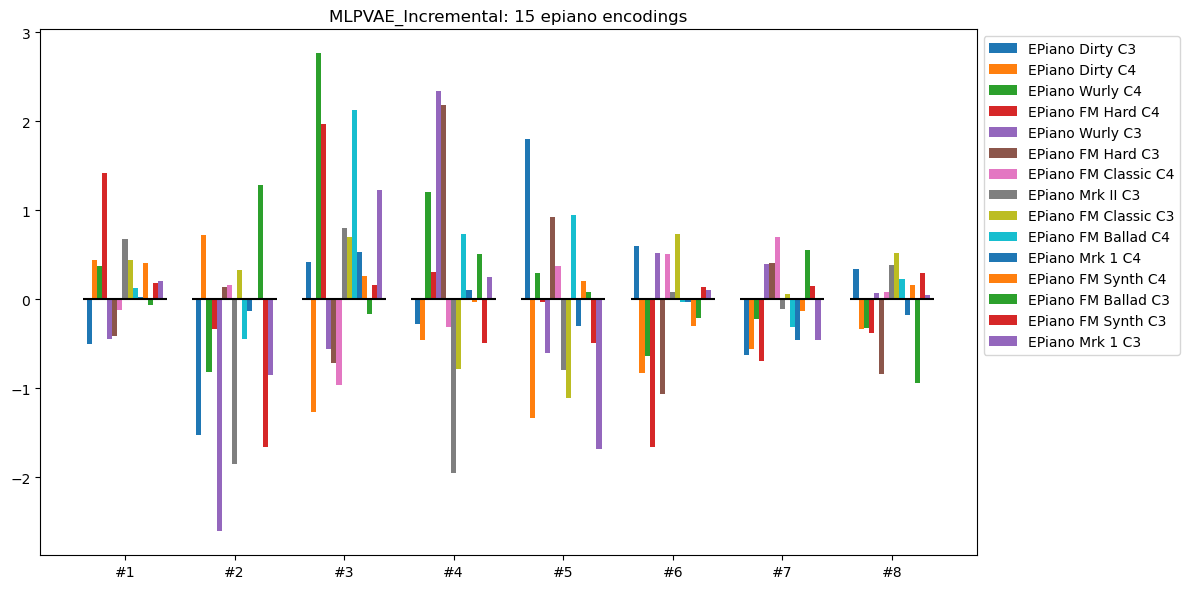

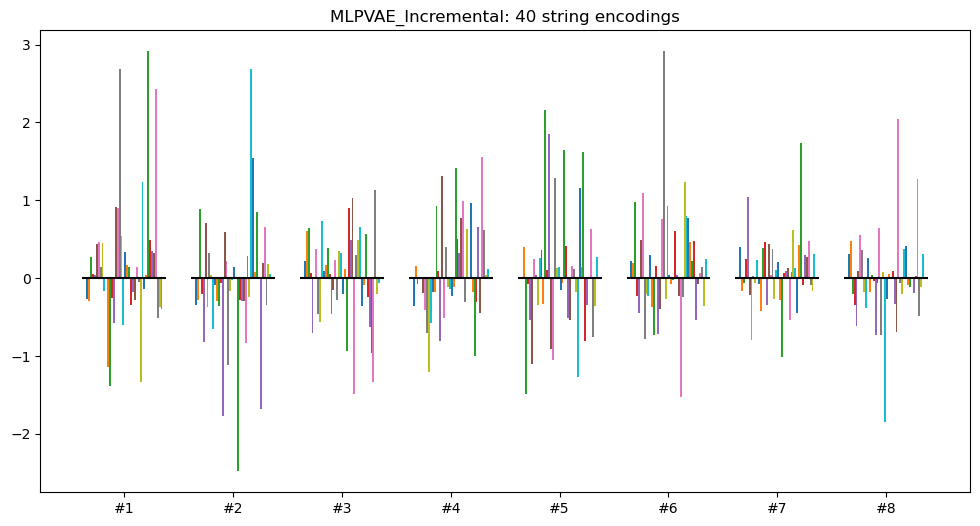

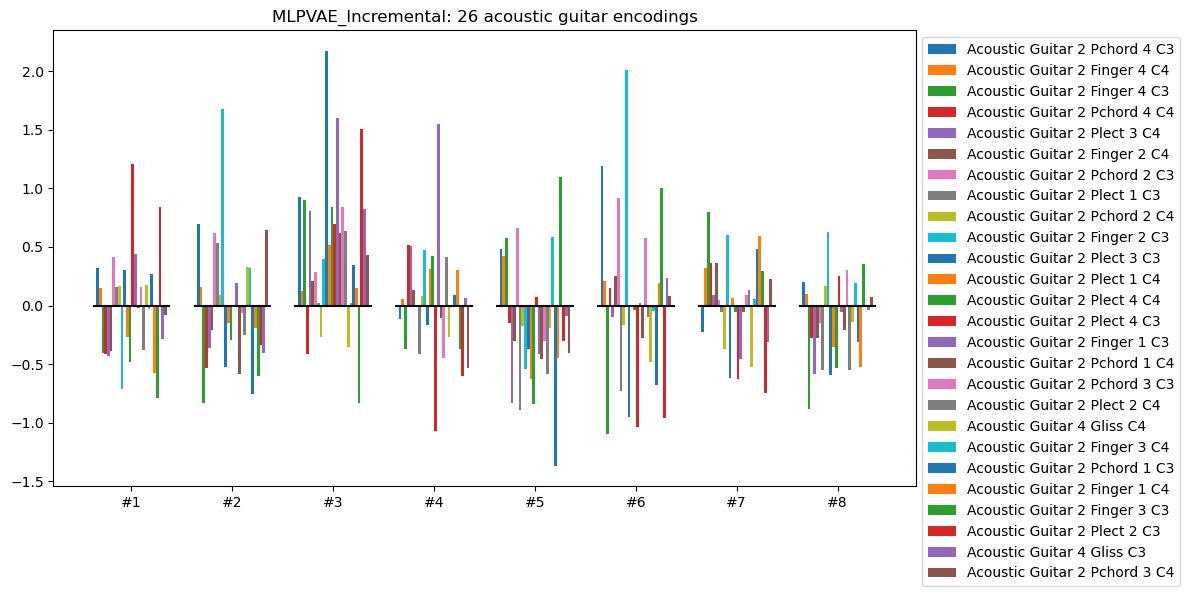

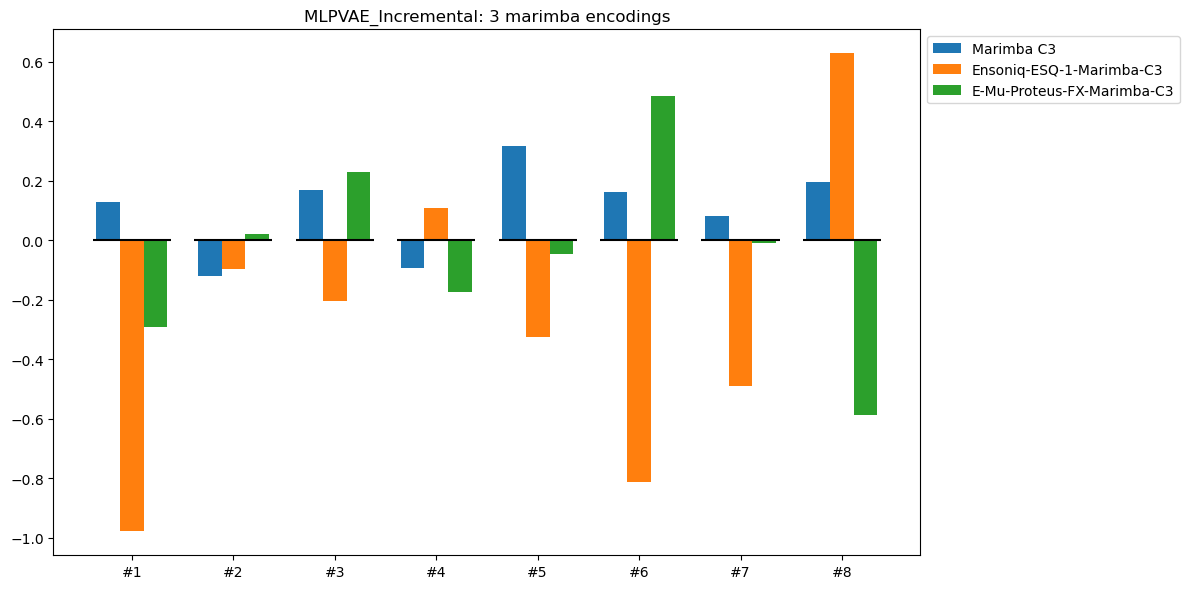

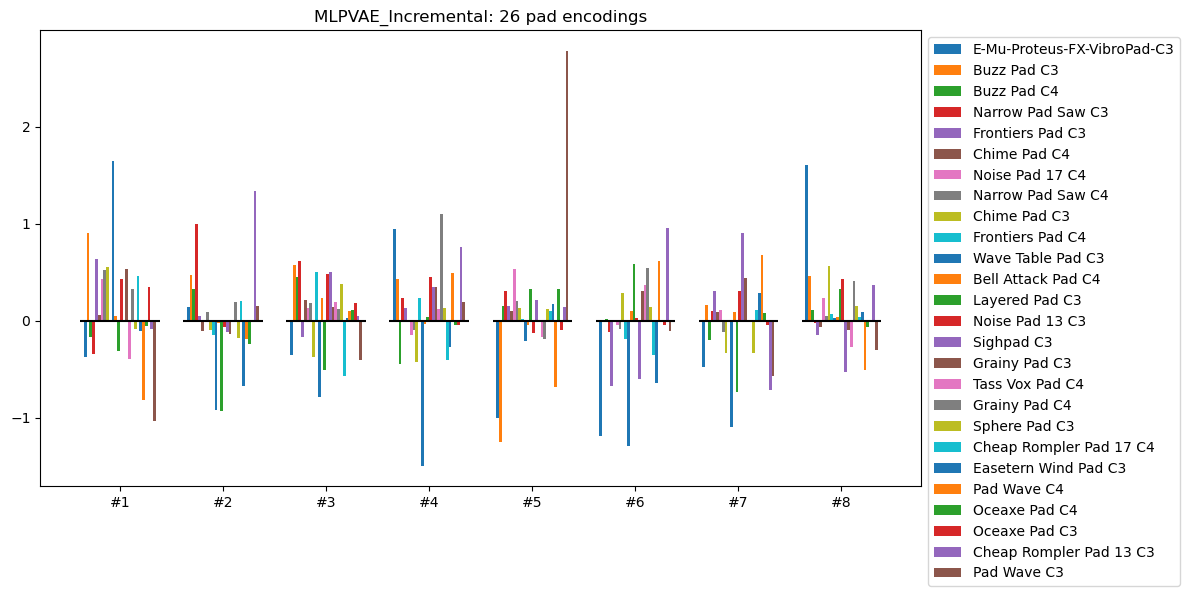

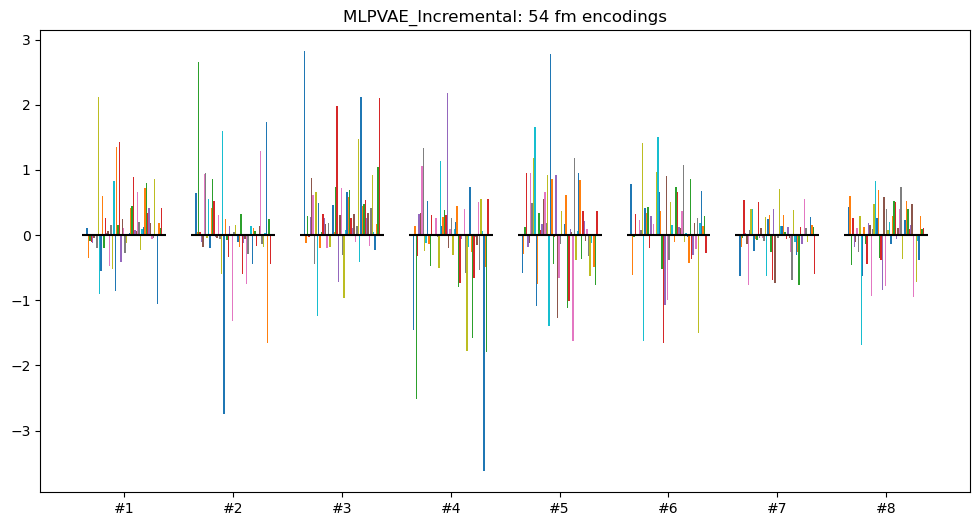

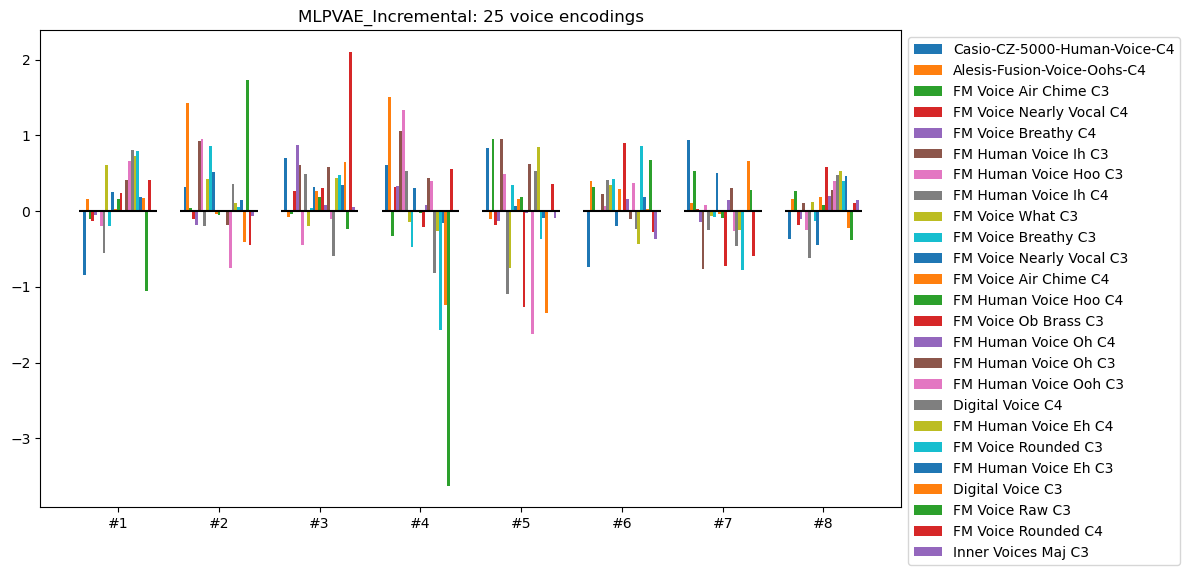

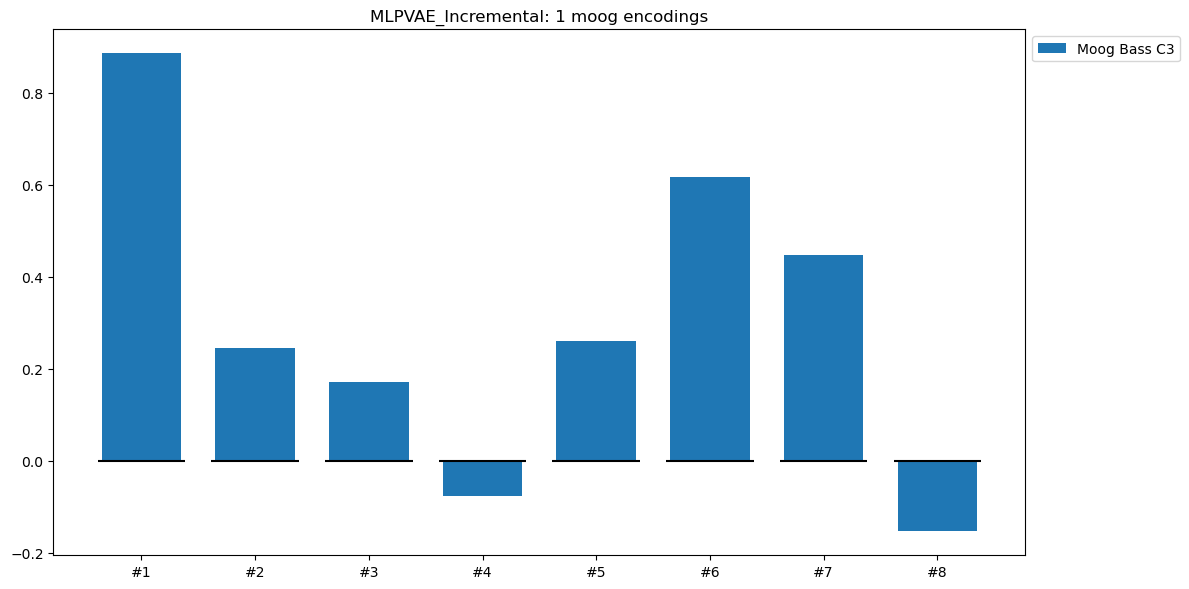

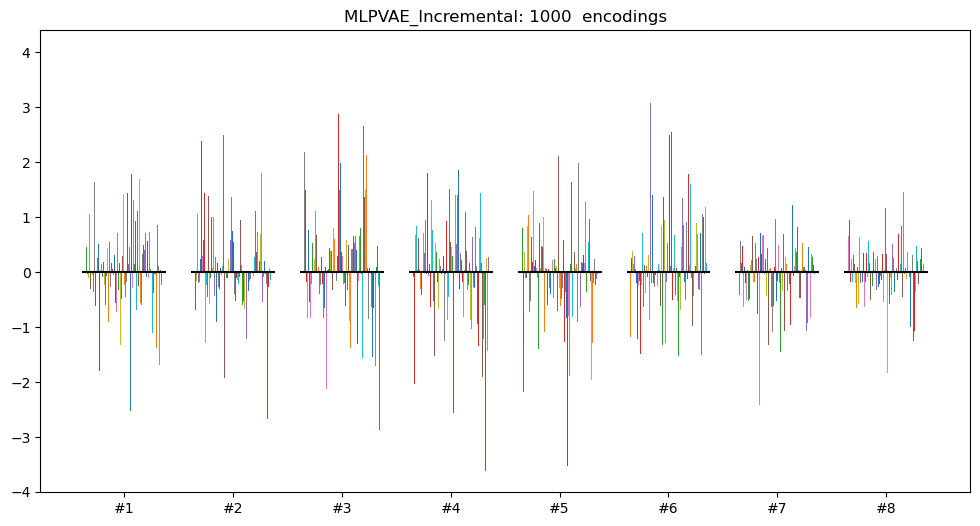

Encoded samples:
 231 x Vocal
 176 x Synth
 127 x Guitar


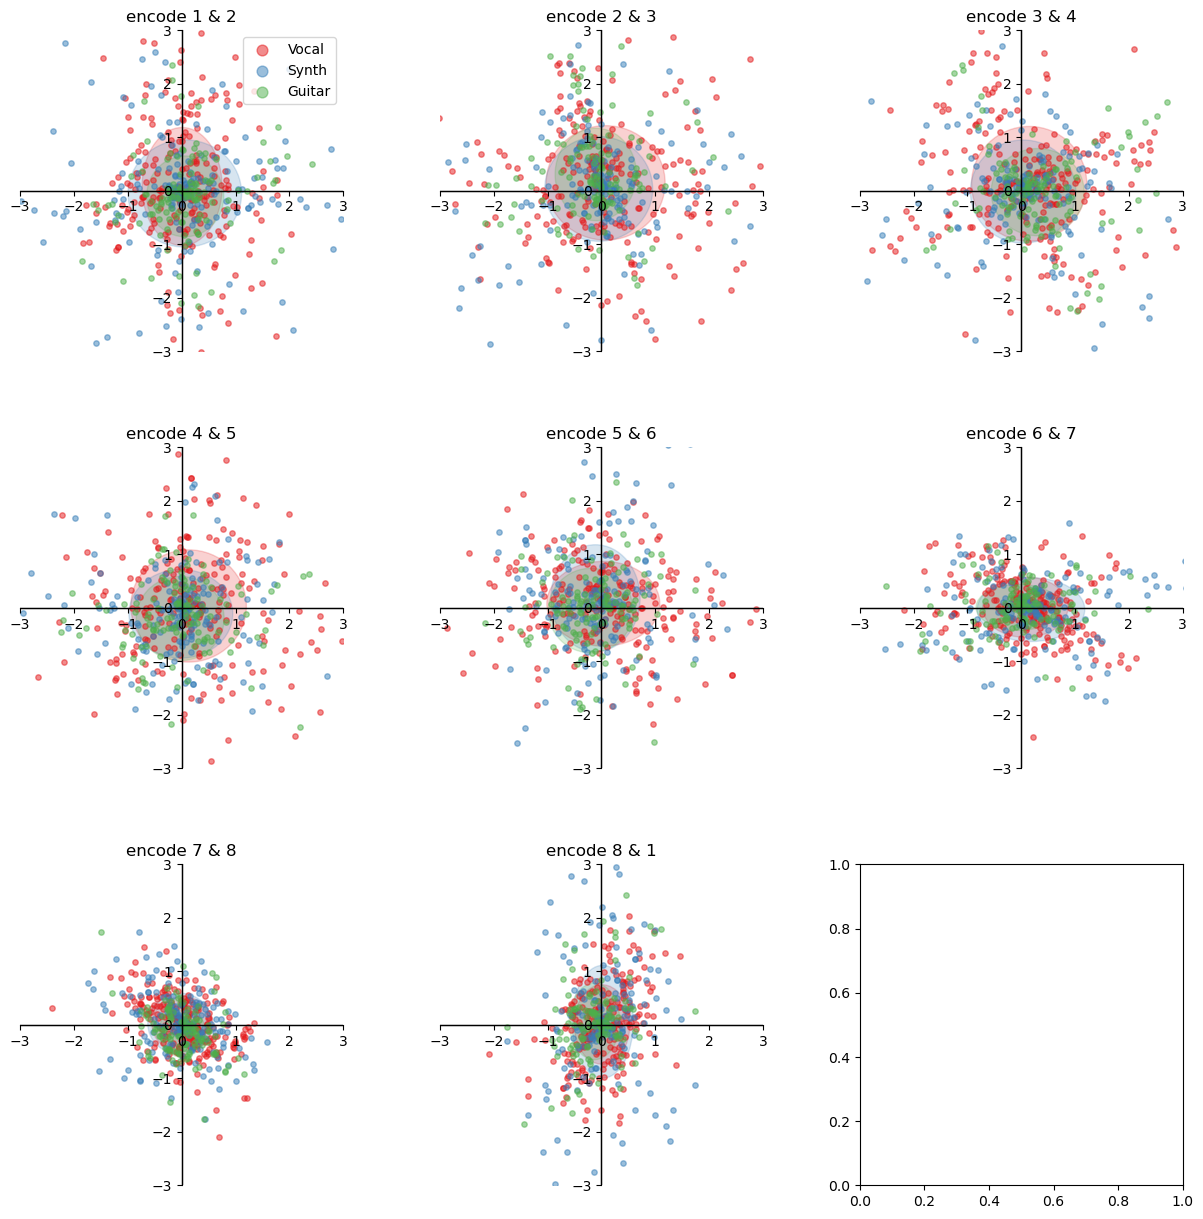

Encoded samples:
  61 x Bass
  49 x Plucked
  32 x Bell


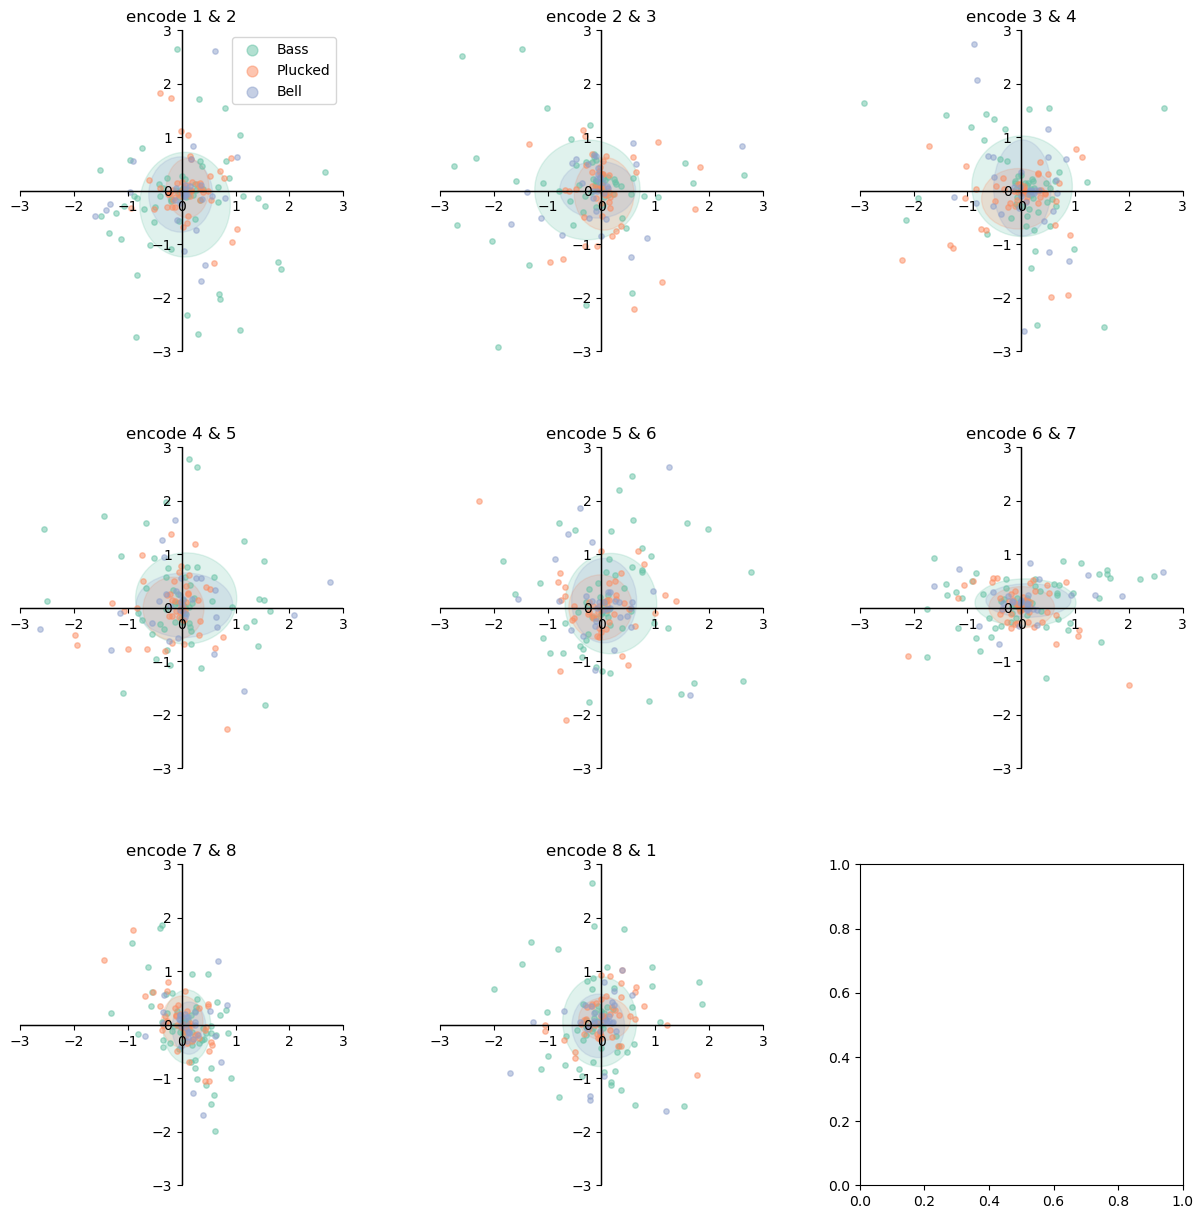

Encoded samples:
 119 x No Category
  62 x Synth Makes
  23 x Piano
  32 x Bell


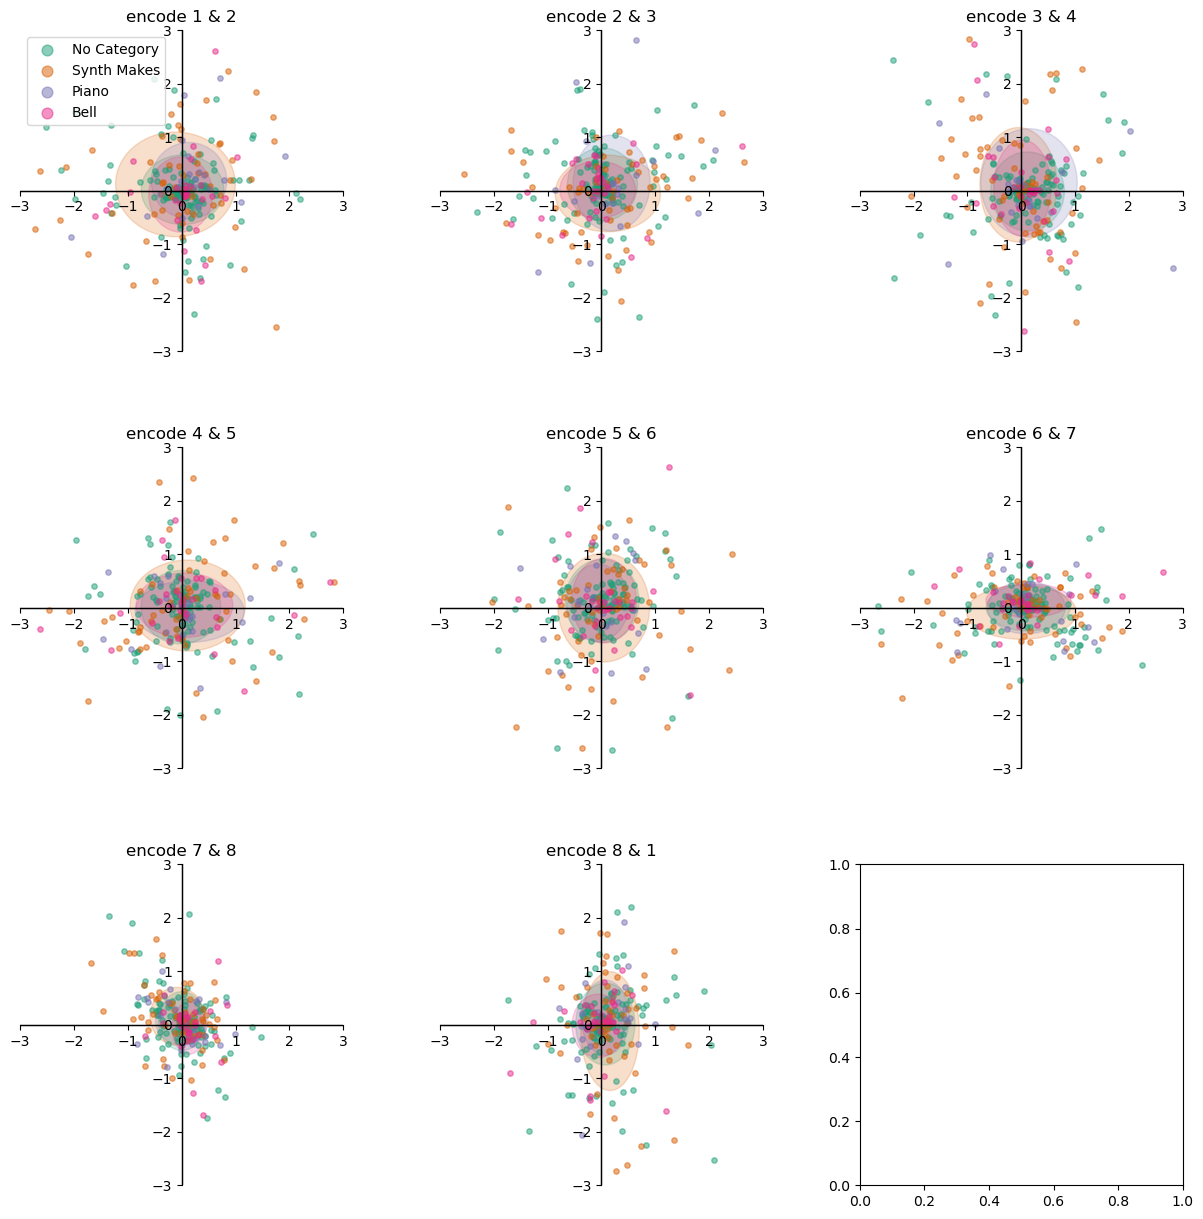

encode = list(2,) x <class 'torch.Tensor'>, size=2 elements


AttributeError: 'tuple' object has no attribute 'shape'

In [5]:
# Test and Generate new samples
from Generate import *

use_model(model)

# Test the accuracy of the model: lists all samples by decreasing accuracy
#test_all()

# Print some pretty pictures of the samples and their encodings
demo_all()



